In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt

In [2]:
"""
images
|-train
|  |-dog
|  |-cat
|-val
   |-dog
   |-cat
"""
"file structure"

'file structure'

In [3]:
trainGen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, \
    rotation_range=90)
valGen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, \
    rotation_range=90)
trainGen = trainGen.flow_from_directory('images/train', target_size=(128, 128), batch_size=32)
valGen = valGen.flow_from_directory('images/val', target_size=(128, 128), batch_size=32)

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
inputL = Input(shape=(128,128,3))
x = Conv2D(128, (3,3), padding='same', activation='relu')(inputL)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputL, x)
model.compile(optimizer="Adam", loss=categorical_crossentropy, metrics=[categorical_accuracy])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0     

In [5]:
history = model.fit(trainGen, epochs=5, validation_data=valGen)

Epoch 1/5
1/1 [==============================] - 0s 446ms/step - loss: 0.6914 - categorical_accuracy: 0.5500 - val_loss: 0.7095 - val_categorical_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 319ms/step - loss: 0.7038 - categorical_accuracy: 0.5000 - val_loss: 0.6880 - val_categorical_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 503ms/step - loss: 0.7037 - categorical_accuracy: 0.5000 - val_loss: 0.6910 - val_categorical_accuracy: 0.6000
Epoch 4/5
1/1 [==============================] - 1s 514ms/step - loss: 0.6875 - categorical_accuracy: 0.5500 - val_loss: 0.6997 - val_categorical_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 481ms/step - loss: 0.6966 - categorical_accuracy: 0.5000 - val_loss: 0.6985 - val_categorical_accuracy: 0.5000


1
(10, 128, 128, 3) (10, 2)


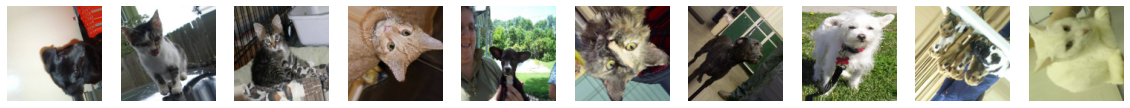

[1 0 0 0 1 0 1 1 1 0]
{'cat': 0, 'dog': 1}


In [58]:
print(len(valGen)) # batches

plt.figure(figsize=(20,5))
batchX, batchy = valGen[0]
print(batchX.shape, batchy.shape)

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(batchX[i])
    plt.axis("off")
plt.show()
print(np.argmax(batchy[:10],axis=1))
print(valGen.class_indices)

In [59]:
yPred = model.predict(valGen)
print(np.argmax(yPred,axis=1))

[0 0 0 0 0 0 0 0 0 0]
